## Exercise 8 - K-means clustering

- Download the dataset from [here](http://student.labranet.jamk.fi/~hantt/data/voice.csv)
- This dataset will be used in exercises 8, 9 and 10
- Dataset includes male and female voice samples with different features
- In this exercise you will use unsupervised machine learning method called K-means clustering for the dataset

1 Import all necessary libraries. Then load the dataset and save it to the dataframe. In this exercise you will use only meanfun (*average of fundamental frequency measured across acoustic signal*) and minfun (*minimum fundamental frequency measured across the acoustic signal*) columns. Filter data so that only forementioned columns will be included.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import seaborn as sns
 

dataset = pd.read_csv("data_files/voice.csv")
datasetfilt = dataset.loc[:,["meanfun","minfun"]]
datasetfilt


,meanfun,minfun
0,0.084279,0.015702
1,0.107937,0.015826
2,0.098706,0.015656
3,0.088965,0.017798
4,0.106398,0.016931
...,...,...
3163,0.182790,0.083770
3164,0.188980,0.034409
3165,0.209918,0.039506
3166,0.172375,0.034483


2 Run the predictions for the data so that it will be categorised for male and female data.

In [72]:
x=datasetfilt.values
kmeans = KMeans(n_clusters=2, init= 'random', max_iter=3000, random_state=42)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, ..., 0, 0, 0])

3 Visualise the data so that clusters for male and female data will be presented in scatter plot (centroids should also be included).

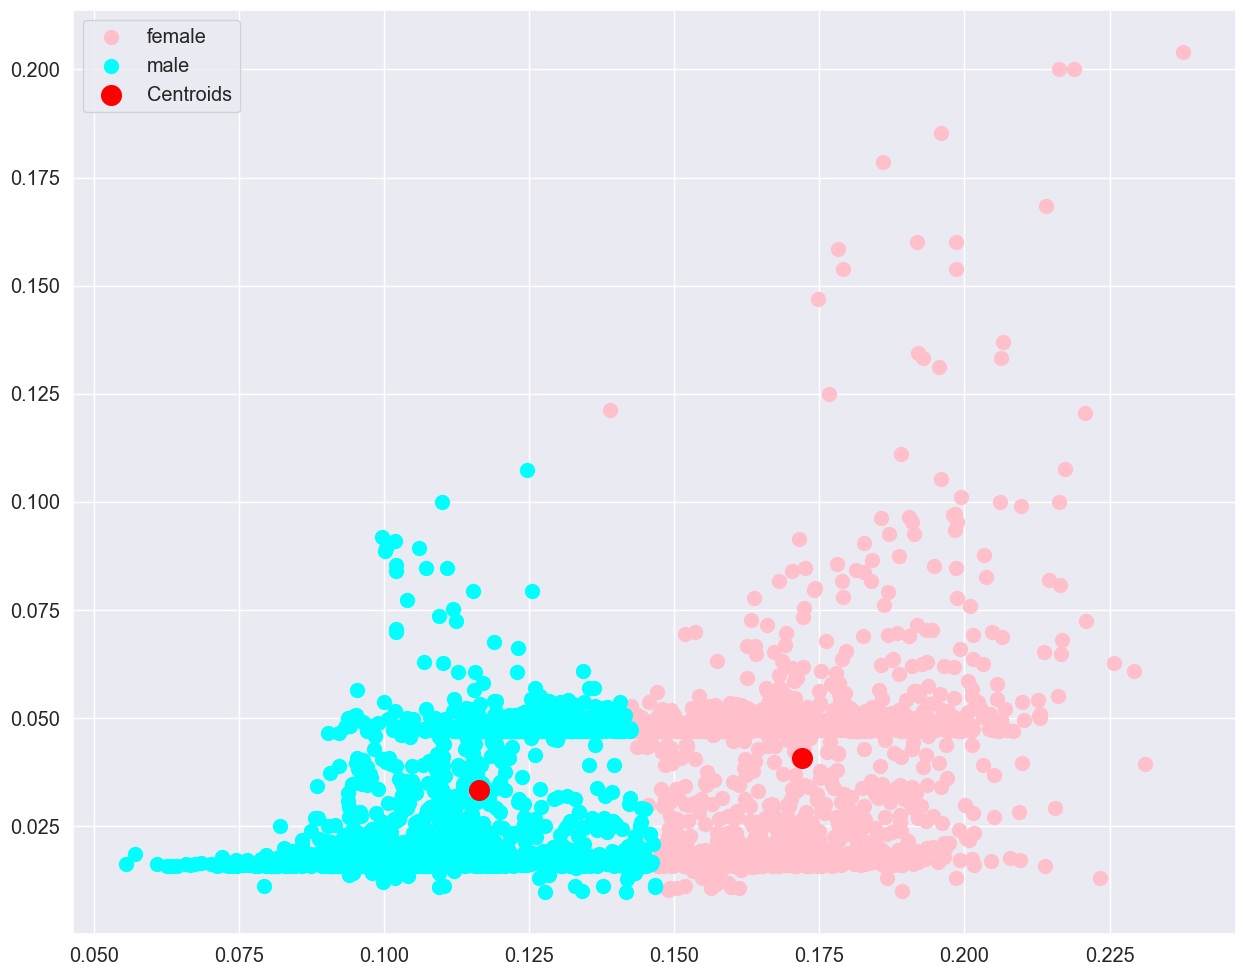

In [73]:
plt.figure(figsize=(15,12))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'pink', label="female")
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'cyan', label="male")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 200, c = 'red', label = 'Centroids')
plt.legend()

4 Validate K-means clustering prediction results using confusion matrix.

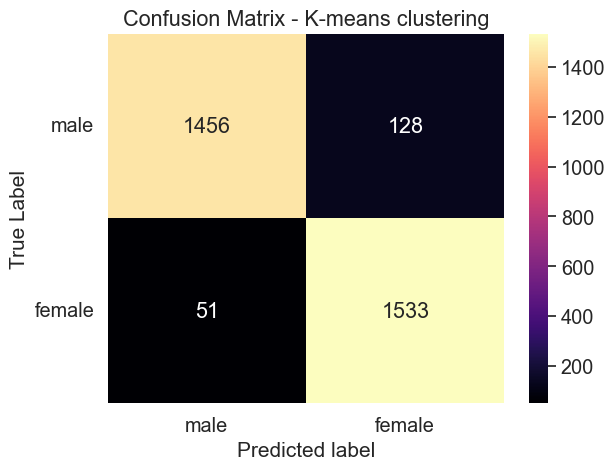

<Figure size 1000x700 with 0 Axes>

In [78]:
truth = []

for i in dataset["label"]:
    if i == "male":
        truth.append(1)
    elif i == "female":
        truth.append(0)

labels = dataset["label"].unique()

confusion_matrix = metrics.confusion_matrix(truth, y_kmeans)

ax = plt.axes()
sns.set_theme(font_scale = 1.3)
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix, annot = True, fmt="g", ax = ax, cmap = "magma")

ax.set_title('Confusion Matrix - K-means clustering')
ax.set_xlabel("Predicted label", fontsize = 15)
ax.set_xticklabels(labels)
ax.set_ylabel("True Label", fontsize = 15)
ax.set_yticklabels(labels, rotation = 0)
plt.show()